In [9]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from tqdm import tqdm

x_size_houses = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
# original w = 2000, b = 100
y_price_houses = [x_size_houses[i]* 2000 + 100 for i in range(len(x_size_houses))]

x_train = np.array(x_size_houses[:8], dtype=np.float32)
y_train = np.array(y_price_houses[:8], dtype=np.float32)

x_test = np.array(x_size_houses[8:], dtype=np.float32)
y_test = np.array(y_price_houses[8:], dtype=np.float32)


In [70]:
from tqdm import tqdm

def original_function(w, x, b):
    return w*x + b

# more clear to see the function
def cost_function(w,b):
    return (1/2*len(x_train)) * np.sum(original_function(w, x_train, b) - y_train)**2

def deri_x_cost_function(w,b):
    return np.sum((original_function(w, x_train, b) - y_train)*x_train)
def deri_b_cost_function(w,b):
    return np.sum((original_function(w, x_train, b) - y_train))

def gradient_descent(w, b, learning_rate=0.01):
    w = w - learning_rate * deri_x_cost_function(w,b)
    b = b - learning_rate * deri_b_cost_function(w,b)
    return w, b

def train(w,b, epochs):
    for i in tqdm(range(epochs)):
        w, b = gradient_descent(w, b)
    return w, b

In [86]:
w_trained, b_trained = train(-1000, 800, 1000)
print("original w = -1000, b = 800")
print("w_trained = {}, b_trained = {}".format(w_trained, b_trained))
print(f"prediction = [{original_function(w_trained, x_test, b_trained)}]")
print(f"ground truth = {y_test}")

 95%|█████████▍| 948/1000 [00:00<00:00, 9478.59it/s]

100%|██████████| 1000/1000 [00:00<00:00, 9354.54it/s]

original w = -1000, b = 800
w_trained = 1999.9994433593793, b_trained = 100.00020385742204
prediction = [[18099.994 20099.994]]
ground truth = [18100. 20100.]


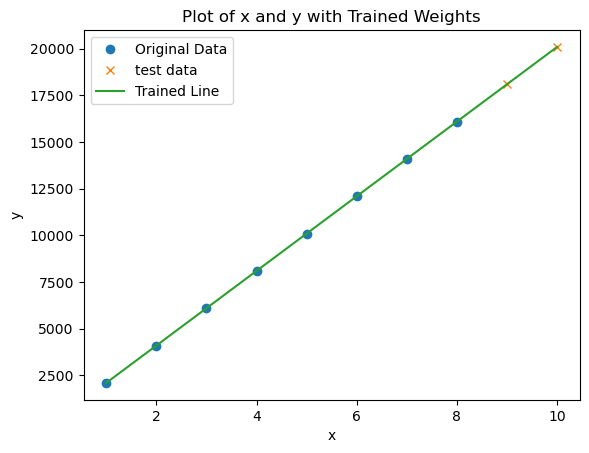

In [87]:
import matplotlib.pyplot as plt

x_size_houses = np.array(x_size_houses, dtype=np.float32)
y_price_houses = np.array(y_price_houses, dtype=np.float32)

plt.plot(x_train, y_train, 'o', label='Original Data')
plt.plot(x_test,y_test,'x',label='test data')
plt.plot(x_size_houses, original_function(w_trained, x_size_houses, b_trained), label='Trained Line')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Plot of x and y with Trained Weights')
plt.legend()
plt.show()

plt.show()
